In [17]:
#Dependencies
import pandas as pd
import tweepy
from datetime import datetime as dt
from datetime import date
from datetime import timedelta
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from time import strftime
import math


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from apikeys import consumer_key, consumer_secret, access_token, access_token_secret




import requests
import json
from apikeys import av_key
import pandas as pd
import os
import csv
import sys

from functools import reduce
from scipy import stats
from textwrap import wrap

In [18]:
# Read Main_Data CSV file

merge_table1=pd.read_csv('Resource_CSVs/Main_data_negative.csv')

# Calculating Correlation - Method 1
# https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.corr.html
merge_table1.corr(method='pearson', min_periods=1)

,index,Likes,Retweets,Compound,Negative,Neutral,Positive,S&P500 Open,S&P500 Close,DJ Open,...,Insurance Same-Day Change,Insurance 1-Day Change,Oil Same-Day Change,Oil 1-Day Change,Semiconductor Same-Day Change,Semiconductor 1-Day Change,Telecom Same-Day Change,Telecom 1-Day Change,Utility Same-Day Change,Utility 1-Day Change
index,1.000000,0.139903,0.140992,-0.008109,0.123681,-0.058294,-0.043324,0.893524,0.888842,0.882433,...,-0.151962,-0.003232,-0.028772,0.177434,-0.112491,0.035494,-0.199418,0.130026,0.084571,-0.106752
Likes,0.139903,1.000000,0.955513,0.259860,-0.220166,0.098746,0.084141,0.159957,0.184711,0.153191,...,-0.018167,-0.141964,-0.010141,-0.068181,0.126455,-0.198908,0.093504,-0.083519,0.004761,-0.058263
Retweets,0.140992,0.955513,1.000000,0.264207,-0.213246,0.061033,0.129727,0.151652,0.174995,0.149198,...,0.021478,-0.120703,-0.043944,-0.055767,0.125352,-0.174720,0.090576,-0.009926,-0.013964,-0.084230
Compound,-0.008109,0.259860,0.264207,1.000000,-0.514909,-0.156761,0.737318,0.057275,0.087333,0.068999,...,0.074227,-0.175065,-0.022526,-0.100428,0.033817,-0.027559,0.043418,-0.034739,-0.109284,-0.010828
Negative,0.123681,-0.220166,-0.213246,-0.514909,1.000000,-0.697636,-0.035179,0.017982,0.007001,0.021869,...,-0.085266,0.137236,0.114331,-0.069491,0.029030,0.154890,0.000861,0.172027,0.272327,-0.029714
Neutral,-0.058294,0.098746,0.061033,-0.156761,-0.697636,1.000000,-0.691459,-0.005236,-0.014021,-0.015946,...,0.060018,-0.021889,-0.126952,0.110818,-0.072021,-0.084647,-0.051318,-0.151501,-0.227715,0.088466
Positive,-0.043324,0.084141,0.129727,0.737318,-0.035179,-0.691459,1.000000,-0.010934,0.012428,0.000097,...,0.002081,-0.108131,0.061865,-0.084880,0.071531,-0.037790,0.071231,0.037687,0.043203,-0.092907
S&P500 Open,0.893524,0.159957,0.151652,0.057275,0.017982,-0.005236,-0.010934,1.000000,0.987148,0.987898,...,-0.247026,-0.021946,-0.029893,0.142449,-0.206476,0.017460,-0.269505,0.117074,-0.003068,-0.107944
S&P500 Close,0.888842,0.184711,0.174995,0.087333,0.007001,-0.014021,0.012428,0.987148,1.000000,0.978425,...,-0.142966,-0.044407,0.015764,0.142566,-0.081011,-0.025893,-0.136677,0.095653,0.029006,-0.126887
DJ Open,0.882433,0.153191,0.149198,0.068999,0.021869,-0.015946,0.000097,0.987898,0.978425,1.000000,...,-0.246804,-0.010165,-0.000189,0.191649,-0.184597,0.008707,-0.228345,0.130828,-0.011798,-0.124263


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d18f8d0>,
      dtype=object)

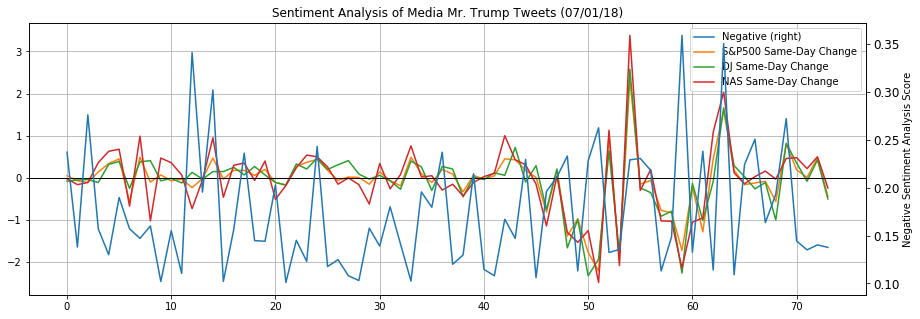

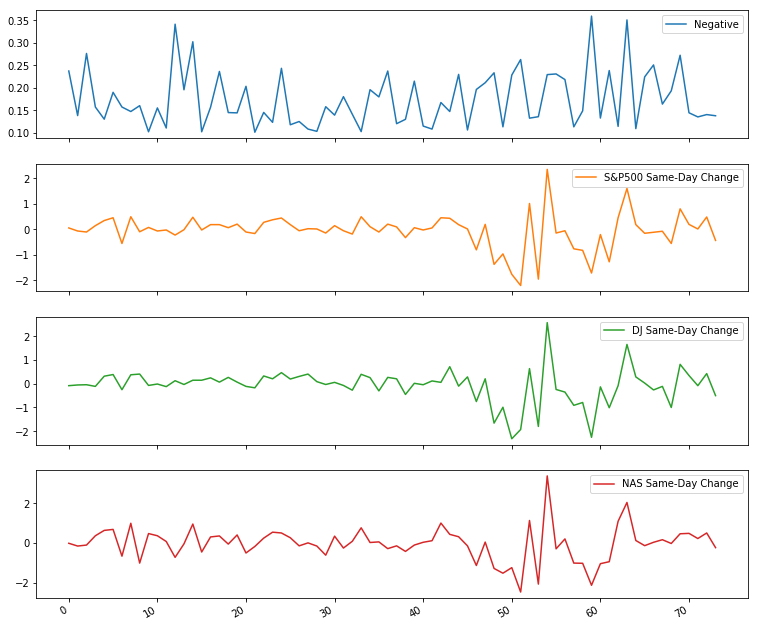

In [31]:

new = merge_table1.filter(['Negative','S&P500 Same-Day Change', 'DJ Same-Day Change', 'NAS Same-Day Change'], axis=1)

new.plot(secondary_y = ["Negative"], grid = True,use_index = False, figsize=(15,5)).axhline(y = 0, color = "black", lw = 1)
plt.tick_params(axis="both", labelsize =12)
# plt.tick_params(axis="secondary_y", labelsize =12)
plt.ylabel("Negative Sentiment Analysis Score")
plt.title("Sentiment Analysis of Media Mr. Trump Tweets (07/01/18)")
plt.savefig("Percent change in Stock against compound.png")

new.plot(subplots=True, figsize=(12.75, 12))